In [6]:
import numpy as np
import scipy.signal as ssg

%matplotlib widget
import matplotlib.pyplot as plt

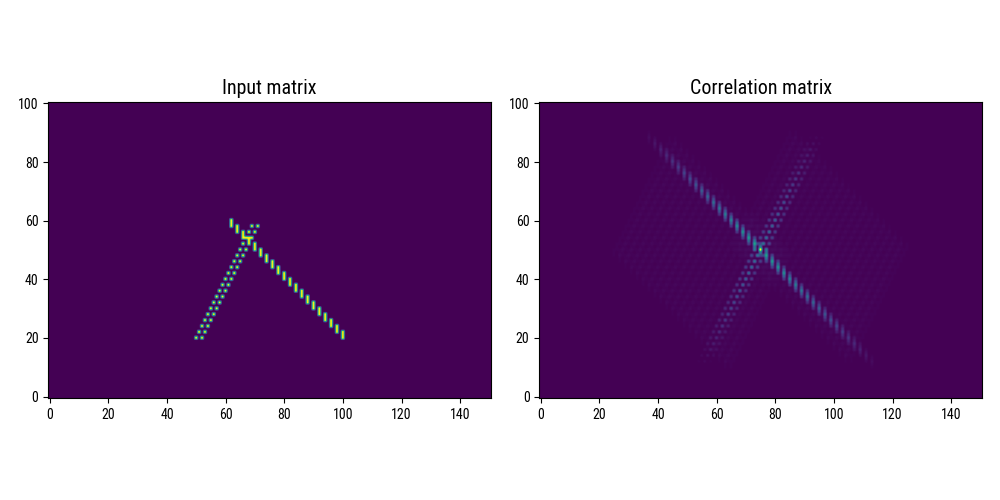

In [12]:
A = np.zeros((101, 151))
for i in range(20):
    A[20+i*2, 50+i] = 1
    A[20+i*2, 50+i+2] = 1
    A[20+i*2, 100-i*2] = 1
    A[20+i*2+1, 100-i*2] = 1
    A[20+i*2+1, 100-i*2] = 1
    A[20+i*2+2, 100-i*2] = 1

ix_max = 10
it_max = 13

corr_A = np.zeros((2*ix_max+1, 2*it_max+1))

for ix, iix in enumerate(range(-ix_max, ix_max+1)):
    for it, iit in enumerate(range(-it_max, it_max+1)):
        corr_A[ix, it] = np.sum(A[:len(A)-abs(iit), :len(A[0])-abs(iix)]*A[abs(iit):, abs(iix):])

corr_A = ssg.correlate2d(A, A, mode='same')

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(A, origin='lower')
axes[0].set_title('Input matrix')
axes[1].imshow(corr_A, origin='lower')
axes[1].set_title('Correlation matrix')
plt.tight_layout()


In [11]:
fft = np.fft.fft2(A)
pwr = np.abs(fft)**2
acor = np.fft.ifft2(pwr).real
freq = np.fft.fft2freq(A.shape[0], 1)

TypeError: fft2() got an unexpected keyword argument 'size'

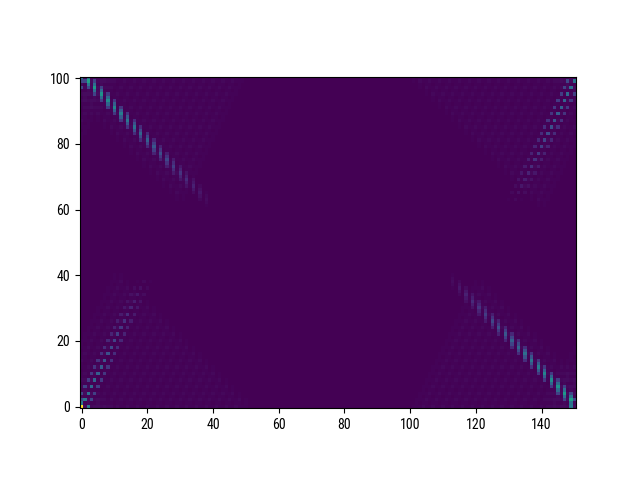

In [9]:
plt.figure()
plt.imshow(acor, origin='lower')
plt.show()

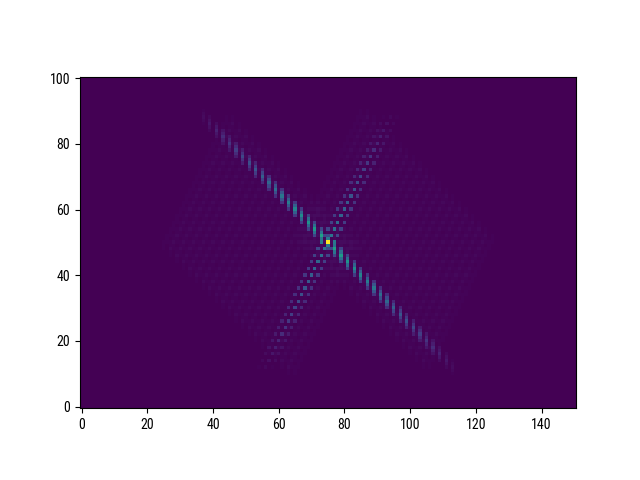

In [13]:
# Re-arrange the correlation matrix to be in the same format as the autocorrelation function
plt.figure()
plt.imshow(np.fft.fftshift(acor), origin='lower')
plt.show()

1.0


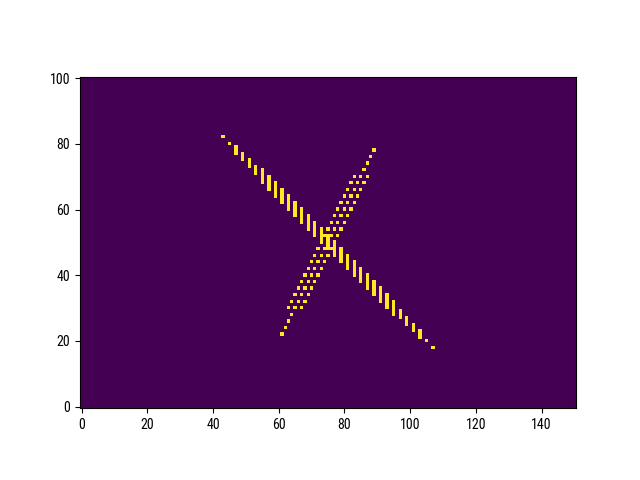

In [20]:


acor = autocorrelation2d(A)
print(acor.max())
plt.figure()
plt.imshow(acor > 0.1, origin='lower')
plt.show()

In [21]:
acor = ssg.fftconvolve(A, A[::-1, ::-1], mode='same')

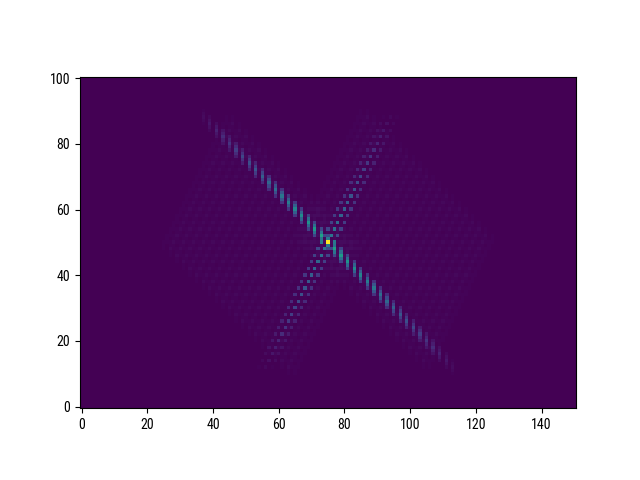

In [22]:
plt.figure()
plt.imshow(acor, origin='lower')
plt.show()